In [1]:
# %matplotlib notebook # useful to add zoom in, out, pan to the plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_original=pd.read_excel('Online Retail.xlsx')

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Data Cleaning:

### 1. Perform a preliminary data inspection and data cleaning.

#### a. Check for missing data and decide how to treat them.

In [4]:
#there is a 136534 total no of null values
df_original.isnull().sum().sum()

136534

In [5]:
# Out of that total no of null values, most of them correspond to CustomerID (135080) and the rest to 
# Description column (1454)
df_original.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#Check the records where CustomerID is null
df_original[df_original['CustomerID'].isnull()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [7]:
# Since CustomerID is the only information that we have about Customers, we will drop the records where the CustomerID 
# is null, because we are going to need this field further in the analysis. We will save the data in a new dataframe, df:
df=df_original.dropna(subset=['CustomerID'])

In [8]:
# If we check again the null values, we will notice that the null values for Description field have also been removed.
# This is because there were records with both CustomerID and Description fields having null values. 
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
# Check to see if all the records with null values for Description have also CustomerID as a null value:
df_original[(df_original['CustomerID'].isnull()==True) & (df_original['Description'].isnull()==True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


### *--> Optional - handling null values*

In [10]:
# If it were to have Description with non-null values for CustomerID we would have handled it like this:
# For Description (i.e Product name) we can either replace that missing value with "No Name" or we can use the mode
# function to replace with the most frequent product name

In [11]:
# check the most frequent product name:
df['Description'].mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

In [12]:
# to cancel the warning  "A value is trying to be set on a copy of a slice from a DataFrame", 
# which will be visible if we execute the next 2 lines
pd.set_option('mode.chained_assignment',None)

In [13]:
#fill the null values with the most frequent product name
df['Description'].fillna(df['Description'].mode()[0],inplace=True)

In [14]:
# or
df['Description'].fillna("No Name",inplace=True)

###  <-- 

#### b. Remove duplicate data records.

In [15]:
#Check the total number of duplicates
df.duplicated().sum()

5225

In [16]:
df.drop_duplicates(inplace=True)

#### c. Perform descriptive analytics on the given data.

In [17]:
df.describe()
#Quantity is having negative values, which is inappropriate 

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
# check the columns with quantity less than 0
df[df['Quantity']<0].count()

InvoiceNo      8872
StockCode      8872
Description    8872
Quantity       8872
InvoiceDate    8872
UnitPrice      8872
CustomerID     8872
Country        8872
dtype: int64

In [19]:
# If the code of InvoiceNo starts with letter 'C', it indicates a cancellation
df[(df["Quantity"]<0)&(df['InvoiceNo'].str.startswith('C')==True)].count()
# which means all the negative values for Quantity are because the invoice is cancelled. 
# So, does not request any action like dropping the records with negative value for Quantity.

InvoiceNo      8872
StockCode      8872
Description    8872
Quantity       8872
InvoiceDate    8872
UnitPrice      8872
CustomerID     8872
Country        8872
dtype: int64

In [20]:
#Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [21]:
# convert CustomerID from float to int64
df['CustomerID']=df['CustomerID'].astype('int64')

In [22]:
# create a new column to show the active and cancelled invoices
df['Invoice_type']=np.where(df['InvoiceNo'].str.startswith('C') == True,"Cancelled","Active")

In [23]:
df['Invoice_type'].value_counts()

Active       392732
Cancelled      8872
Name: Invoice_type, dtype: int64

In [24]:
# visualize the outliers for Quantity,UnitPrice
df1=df[['Quantity','UnitPrice']]

(-30.0, 30.0)

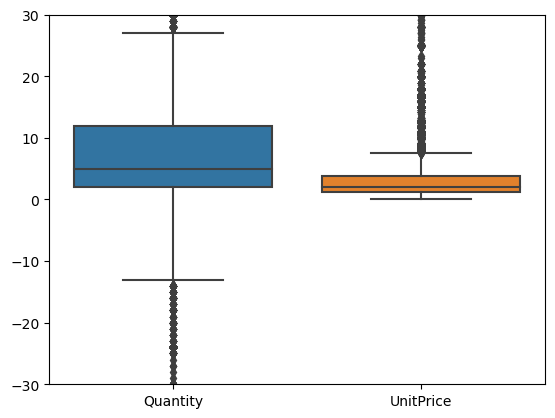

In [25]:
sns.boxplot(data=df1)
plt.ylim([-30,30])

## Data Transformation:

### 2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

#### a. Create month cohorts and analyze active customers for each cohort.    

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Active
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Active
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Active
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Active
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Active


In [27]:
df['InvoiceDate'].dt.year.unique()  # List of years

array([2010, 2011], dtype=int64)

In [28]:
df['InvoiceDate'].dt.month.unique()  # List of months 

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [ ]:
# A method to create the InvoiceYearMonth column and make it string in order to be able to concatenate:
# df['InvoiceYearMonth']=df['InvoiceDate'].dt.year.astype('str')+'-'+df['InvoiceDate'].dt.month.astype('str')

In [29]:
# The second method to create a new column with only year and month of the invoice
from datetime import datetime
# strftime converts datetime to string:
df['InvoiceYearMonth']=df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_type,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Active,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Active,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Active,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Active,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Active,2010-12


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         401604 non-null  object        
 1   StockCode         401604 non-null  object        
 2   Description       401604 non-null  object        
 3   Quantity          401604 non-null  int64         
 4   InvoiceDate       401604 non-null  datetime64[ns]
 5   UnitPrice         401604 non-null  float64       
 6   CustomerID        401604 non-null  int64         
 7   Country           401604 non-null  object        
 8   Invoice_type      401604 non-null  object        
 9   InvoiceYearMonth  401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 33.7+ MB


In [32]:
# No of customers and invoices across year-month
crosstab=df.groupby('InvoiceYearMonth').agg({'CustomerID':'nunique',
                                        'InvoiceNo':'nunique'
                                         })
crosstab

,CustomerID,InvoiceNo
InvoiceYearMonth,,
2010-12,948,1708
2011-01,783,1236
2011-02,798,1202
2011-03,1020,1619
2011-04,899,1384
2011-05,1079,1849
2011-06,1051,1707
2011-07,993,1593
2011-08,980,1544


In [63]:
ticks=['2010 Dec', '2011 Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov',
       'Dec']

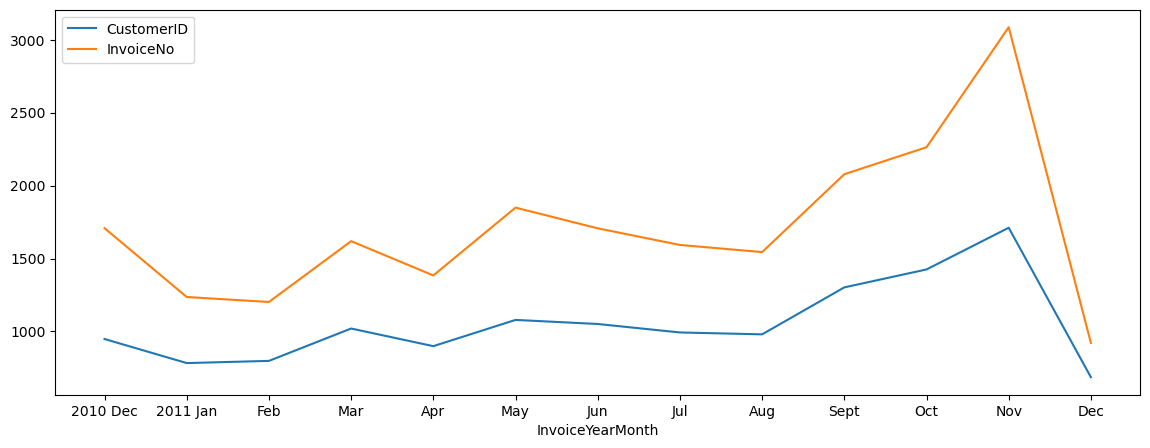

In [65]:
# Plotting the no of customers and the no of invoices across different months
# pd.Series.nunique - means countdistinct
ax=crosstab.plot(figsize=(14,5),xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(ticks);

In [ ]:
# The count of customers and transactions are showing an upward trend, over the months, especially in November, 
# with a decrease in December.
# Possible explanation for sales increasing in November is due to Black Friday and Cyber Monday deals.

#### b. Analyze the retention rate of customers.

In [66]:
# create a new column to see the month when the a customer did a transaction for the first time
df['FirstTransaction']=df.groupby('CustomerID')['InvoiceYearMonth'].transform('min')

In [ ]:
# df[df['CustomerID']==17850][:]

A new column is created where we can see the the months between each transaction compared to the first one.
This helps to check the user retention.

*Create the retention column*

In [ ]:
# Method 1 
# convert 'InvoiceYearMonth' and 'FirstTransaction' from string to datetime
# df['InvoiceYearMonth']=pd.to_datetime(df['InvoiceYearMonth'])
# df['FirstTransaction']=pd.to_datetime(df['FirstTransaction'])
# df['retention']=df['InvoiceYearMonth']-df['FirstTransaction']
# df['retention']=df['retention']/np.timedelta64(1,'M')
# df['retention']=df['retention'].astype('int64')

In [68]:
# Method 2
# convert the InvoiceYearMonth and FirstTransaction columns from object/string into datetime 
df['InvoiceYearMonth']=pd.to_datetime(df['InvoiceYearMonth'])
df['FirstTransaction']=pd.to_datetime(df['FirstTransaction'])
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

invoice_year, invoice_month = get_date(df, 'InvoiceYearMonth')
first_transaction_year, first_transaction_month = get_date(df, 'FirstTransaction')

year_diff = invoice_year - first_transaction_year
month_diff = invoice_month - first_transaction_month

df['months_retention'] = year_diff * 12 + month_diff

In [75]:
data_retention=df.groupby(['FirstTransaction','months_retention'])['CustomerID'].agg('nunique').to_frame()
data_retention

CustomerID
FirstTransaction months_retention            
2010-12-01       0                        948
                 1                        362
                 2                        317
                 3                        367
                 4                        341
...                                       ...
2011-10-01       1                         93
                 2                         46
2011-11-01       0                        321
                 1                         43
2011-12-01       0                         41

[91 rows x 1 columns]

In [92]:
df.to_excel('test.xlsx')

In [89]:
data_retention.to_csv('test.csv')

In [93]:
retention_pivot=data_retention.pivot_table(index = 'FirstTransaction',
                                       columns = 'months_retention',
                                       values = 'CustomerID',fill_value=0)
# fill_value replaces NaN with 0
retention_pivot

months_retention,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstTransaction,,,,,,,,,,,,,
2010-12-01,948,362,317,367,341,376,360,336,336,374,354,474,260
2011-01-01,421,101,119,102,138,126,110,108,131,146,155,63,0
2011-02-01,380,94,73,106,102,94,97,107,98,119,35,0,0
2011-03-01,440,84,112,96,102,78,116,105,127,39,0,0,0
2011-04-01,299,68,66,63,62,71,69,78,25,0,0,0,0
2011-05-01,279,66,48,48,60,68,74,29,0,0,0,0,0
2011-06-01,235,49,44,64,58,79,24,0,0,0,0,0,0
2011-07-01,191,40,39,44,52,22,0,0,0,0,0,0,0
2011-08-01,167,42,42,42,23,0,0,0,0,0,0,0,0


The 13th column (last column) and 2010–12–01 row (first row) means 260 users out of 948 users were still buying things after the 13 months from 
2010-12-1.
The user retention rate is quite low, since the no of active customers, who keeps on purchasing is reducing.

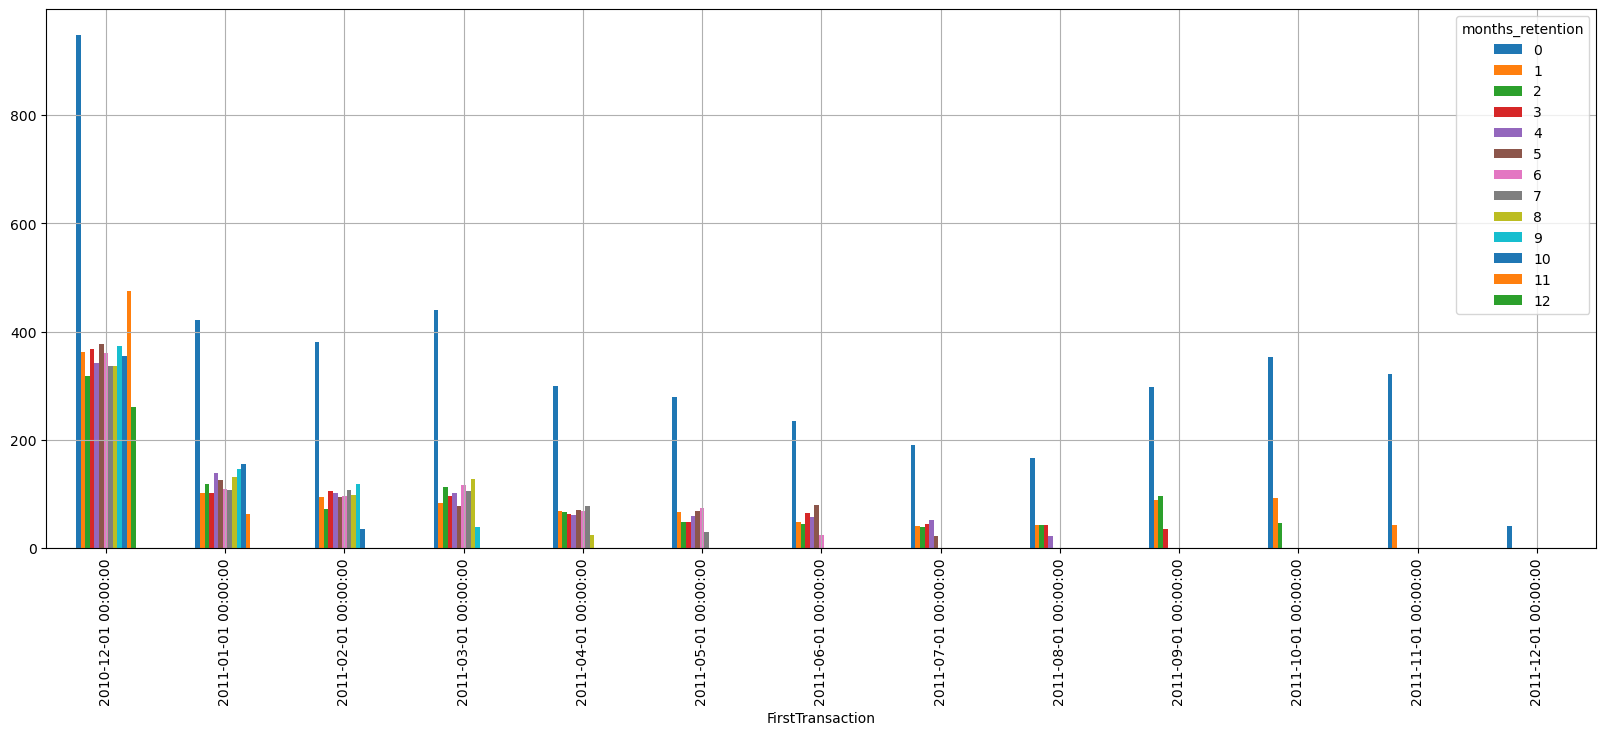

In [74]:
retention_pivot.plot(kind='bar',legend=True,figsize=(20,7))
plt.grid()

## Data Modeling using RFM :
### 1. Build a RFM (Recency Frequency Monetary) model.

*Recency* means the number of days since a customer made the last purchase.

*Frequency* is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. 

*Monetary* is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.



In [94]:
# First add a new column called Total Price=Quantity*UnitPrice
df["Total Price"]=df['Quantity']*df['UnitPrice']

In [95]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_type,InvoiceYearMonth,FirstTransaction,months_retention,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Active,2010-12-01,2010-12-01,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Active,2010-12-01,2010-12-01,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Active,2010-12-01,2010-12-01,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Active,2010-12-01,2010-12-01,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Active,2010-12-01,2010-12-01,0,20.34


**save the dataframe to csv**

In [ ]:
# df.to_csv('df_original_P3.csv')

### 2. Calculate RFM metrics.

In [ ]:
# from datetime import timedelta

In [96]:
# Setting a date value from which RECENCY can be calculated (considered as of today, but for this dataset with old values
# we will consider it the maximum date)
recency_date=df['InvoiceDate'].max()

In [97]:
rfm= df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max()-x.max()).days,
                                   'InvoiceNo': lambda x: len(x),
                                    'Total Price' : lambda x : sum(x)
                                       })
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'Total Price': 'Monetary'}, inplace=True)

rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,2,0.00
12347,1,182,4310.00
12348,74,31,1797.24
12349,18,73,1757.55
12350,309,17,334.40


In [98]:
# Although Customer 12346 has for Frequency 2, the Monetary is 0.
# This is because he did a transaction and then he canceled it:
# df[df['CustomerID']==12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_type,InvoiceYearMonth,FirstTransaction,months_retention,Total Price
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,Active,2011-01-01,2011-01-01,0,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,Cancelled,2011-01-01,2011-01-01,0,-77183.6


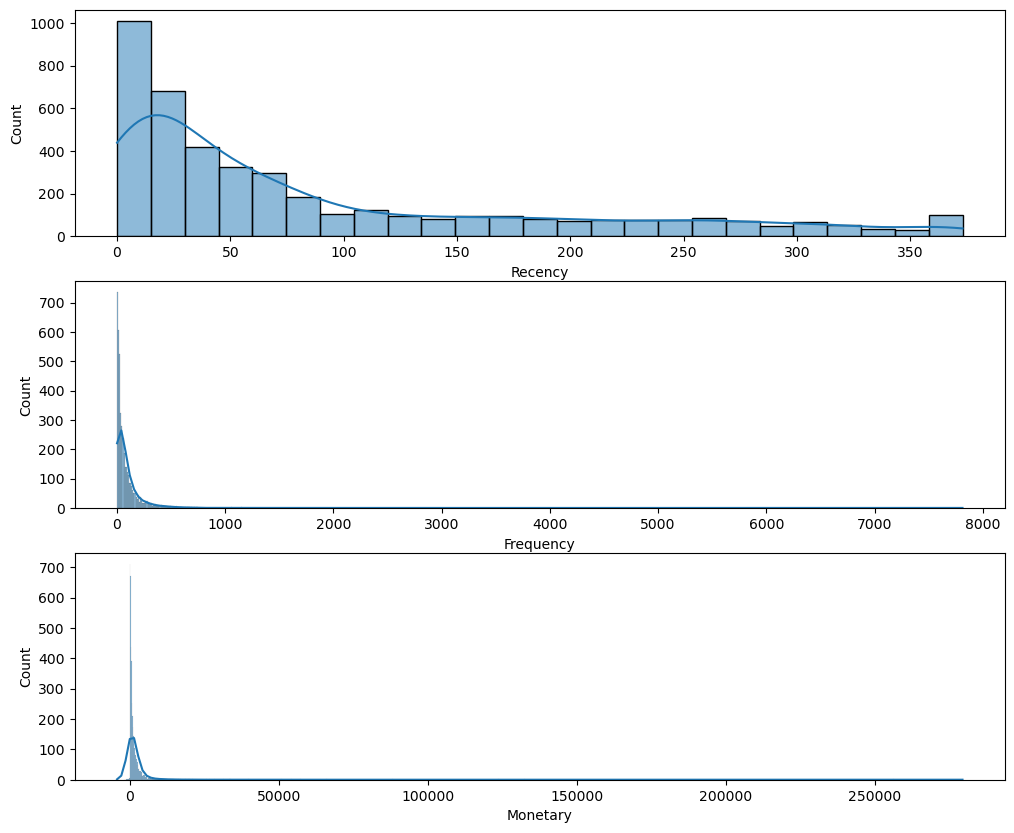

In [99]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.histplot(rfm['Recency'],kde=True)
# Plot distribution of F
plt.subplot(3, 1, 2); sns.histplot(rfm['Frequency'],kde=True)
# Plot distribution of M
plt.subplot(3, 1, 3); sns.histplot(rfm['Monetary'],kde=True)
# Show the plot
plt.show()

This plot provides us with some very interesting insights and how skewed our data is (right skew). The important thing to take note here is that we will be grouping these values in quartiles

### 3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

In [100]:
print(list(range(4,0, -1)))
print(list(range(1, 5)))

[4, 3, 2, 1]
[1, 2, 3, 4]


In [101]:
# the label for recency is in descending order because important clients are the ones that purchased recently
# (that means clients corresponding to the higher score 4)

In [102]:
# it will split the data into 4 groups (with scores 1,2,3,4). clients with higher score are the most targeted.

In [103]:
# --Calculate R F, M segments--
# Create labels for R, F, M
r_labels = range(4,0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

# Assign labeles from 1 to 4 depending on the value of recency, frequency and monetary 
# qcut- equal-sized buckets based on rank or based on sample quantiles.
r_segment = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_segment = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_segment = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

In [104]:
rfm = rfm.assign(R = r_segment.values, F = f_segment.values, M=m_segment.values)
rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,325,2,0.00,1,1,1
12347,1,182,4310.00,4,4,4
12348,74,31,1797.24,2,2,4
12349,18,73,1757.55,3,3,4
12350,309,17,334.40,1,1,2


#### a.  Combine three ratings to get a RFM segment (as strings).

In [106]:
rfm['RFM_segment'] = rfm.apply(lambda x: (str(x['R']) + str(x['F']) + str(x['M'])), axis=1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_segment
CustomerID,,,,,,,
12346,325,2,0.00,1,1,1,111
12347,1,182,4310.00,4,4,4,444
12348,74,31,1797.24,2,2,4,224
12349,18,73,1757.55,3,3,4,334
12350,309,17,334.40,1,1,2,112


#### b.  Get the RFM score by adding up the three ratings.

In [107]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [108]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_Score
CustomerID,,,,,,,,
12346,325,2,0.00,1,1,1,111,3
12347,1,182,4310.00,4,4,4,444,12
12348,74,31,1797.24,2,2,4,224,8
12349,18,73,1757.55,3,3,4,334,10
12350,309,17,334.40,1,1,2,112,4


In [109]:
rfm.dtypes

Recency           int64
Frequency         int64
Monetary        float64
R              category
F              category
M              category
RFM_segment      object
RFM_Score         int64
dtype: object

#### c.  Analyze the RFM segments by summarizing them and comment on the findings.

In [110]:
rfm['RFM_Score'].unique()

array([ 3, 12,  8, 10,  4,  9,  7, 11,  6,  5], dtype=int64)

In [ ]:
# the customers with RFM_Score are the premium customers (VIP)
# we have customers with RFM_Score between 3 and 12

In [111]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'VIP'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 9)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Promising'
    else:
        return 'Needs Attention'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346,325,2,0.00,1,1,1,111,3,Needs Attention
12347,1,182,4310.00,4,4,4,444,12,VIP
12348,74,31,1797.24,2,2,4,224,8,Loyal
12349,18,73,1757.55,3,3,4,334,10,VIP
12350,309,17,334.40,1,1,2,112,4,Promising


In [112]:
rfm[['RFM_Score','RFM_Level']].value_counts()


RFM_Score  RFM_Level      
5          Potential          515
12         VIP                470
6          Potential          469
8          Loyal              467
10         VIP                442
7          Loyal              439
9          VIP                413
3          Needs Attention    393
4          Promising          390
11         VIP                374
dtype: int64

In [113]:
# The RFM Levels in percentages:
rfm['RFM_Level'].value_counts()/rfm['RFM_Level'].count()*100

VIP                38.860933
Potential          22.506862
Loyal              20.722781
Needs Attention     8.989021
Promising           8.920403
Name: RFM_Level, dtype: float64

We can see that a large percentage (~60%) of our customers are in the top tier RFM levels.
The rest of the customers are not loyal, and needs some kind of marketing strategy to bring them back

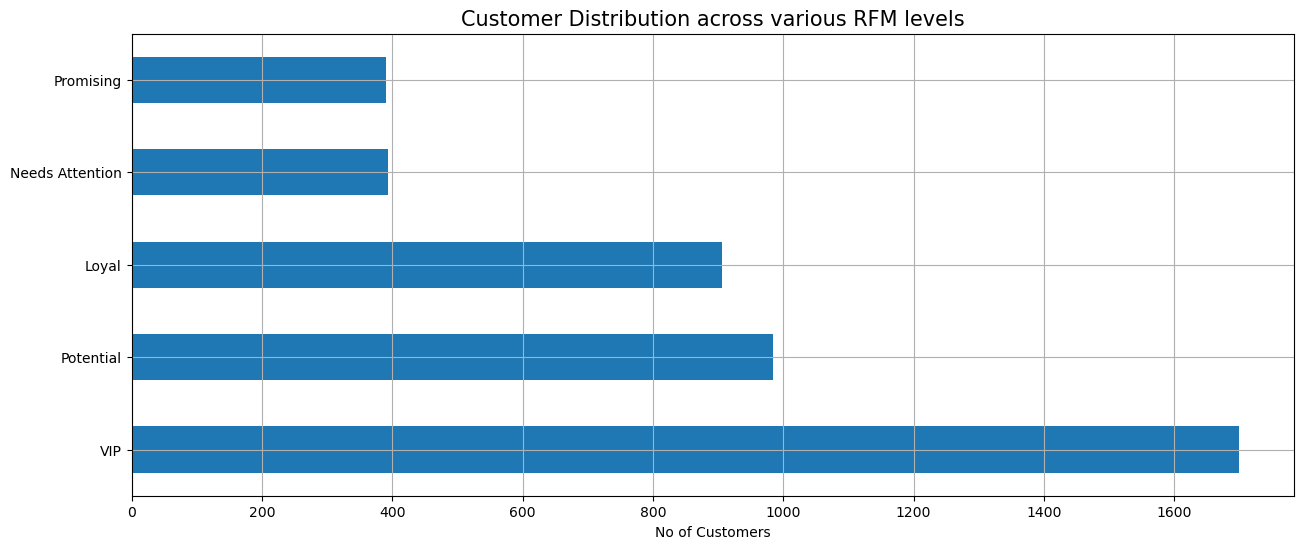

In [117]:
rfm['RFM_Level'].value_counts().plot(kind='barh',figsize=(15,6))
plt.grid()
plt.title('Customer Distribution across various RFM levels',fontsize=15)
plt.xlabel('No of Customers')
plt.show()

In [118]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346,325,2,0.00,1,1,1,111,3,Needs Attention
12347,1,182,4310.00,4,4,4,444,12,VIP
12348,74,31,1797.24,2,2,4,224,8,Loyal
12349,18,73,1757.55,3,3,4,334,10,VIP
12350,309,17,334.40,1,1,2,112,4,Promising


**save the dataframe to csv**

In [ ]:
# rfm.to_csv('df_rfm.csv')

### Data Modeling :

1. Create clusters using k-means clustering algorithm.

    a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

In [119]:
#take the first 4 columns from rfm_data
rfm_data2=rfm.iloc[:,[0,1,2,7]]

In [120]:
rfm_data2.head()

,Recency,Frequency,Monetary,RFM_Score
CustomerID,,,,
12346,325,2,0.00,3
12347,1,182,4310.00,12
12348,74,31,1797.24,8
12349,18,73,1757.55,10
12350,309,17,334.40,4


In [121]:
rfm_data2.reset_index(inplace=True)

In [123]:
# Check Data Skewness 
##  use skew function
#0=Normal; positive values=right skew; negative values=left skew
rfm_data2.skew()

CustomerID     0.000918
Recency        1.249665
Frequency     18.094086
Monetary      21.704784
RFM_Score      0.041280
dtype: float64

In [125]:
rfm_data2.dtypes

CustomerID      int64
Recency         int64
Frequency       int64
Monetary      float64
RFM_Score       int64
dtype: object

Data transformation is required to make the data features normally distributed as **clustering** algorithms **requires** features to be **normally distributed**

*The techniques to normalize the data are:*

     - remove outliers (you can use boxplot or create a user defined function);
     - apply log transformation.

#### <center> Log transformation

In [126]:
# Use Log transformation to normalize the data
## Hint : use np.log function 
# 0.1 is a small noise, because if recency is 0, log 0 is inf
rfm_r_log = np.log(rfm_data2['Recency']+0.1) #can't take log(0) and so add a small number
rfm_f_log = np.log(rfm_data2['Frequency']+0.1)
rfm_m_log = np.log(rfm_data2['Monetary']+0.1)

C:\Users\gabri\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# np.log(-1) this is why the above warning, because log will meet at a point a negative value

In [127]:
## merge all the tranformed features and create a dataframe
log_data = pd.DataFrame({'Recency': rfm_r_log,
                         'Frequency': rfm_f_log,'Monetary': rfm_m_log,'RFM_score':rfm_data2['RFM_Score']})
log_data.head()

,Recency,Frequency,Monetary,RFM_score
0,5.784133,0.741937,-2.302585,3
1,0.095310,5.204556,8.368716,12
2,4.305416,3.437208,7.494063,8
3,2.895912,4.291828,7.471733,10
4,5.733665,2.839078,5.812637,4


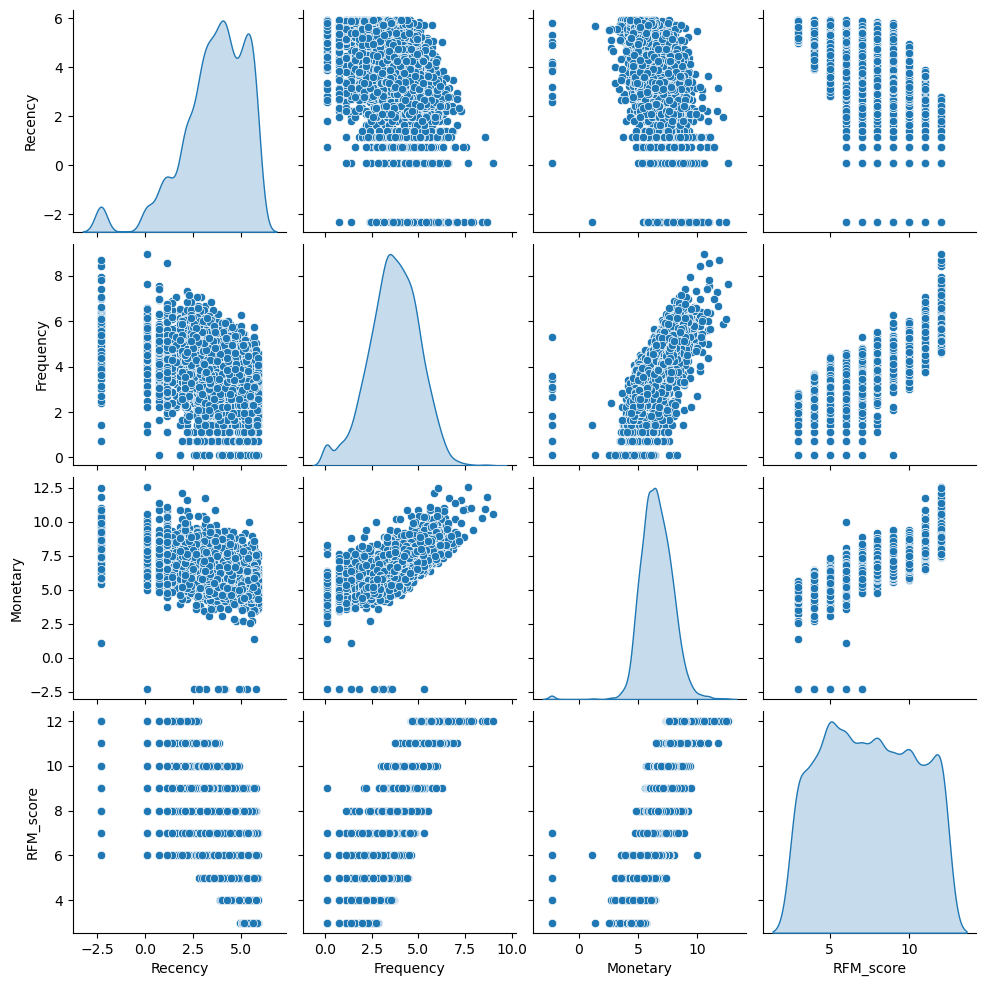

In [128]:
sns.pairplot(log_data,diag_kind='kde');
#Now the distributions are closer to a normal distribution

In [129]:
log_data.skew()

Recency     -1.148297
Frequency   -0.216083
Monetary    -0.574049
RFM_score    0.041280
dtype: float64

In [130]:
# The log transformation has solved the skewness to almost zero, being close to a normal distribution

<AxesSubplot:>

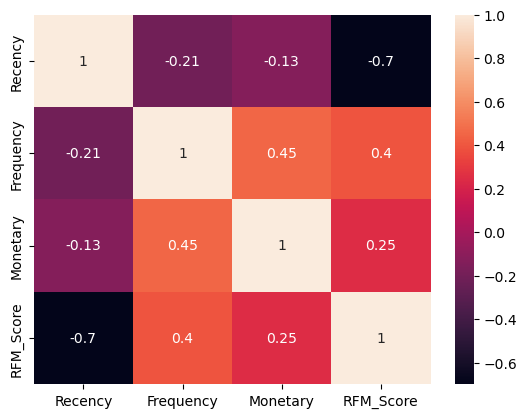

In [132]:
# correlation before normalizing
sns.heatmap(rfm.corr(),annot=True)

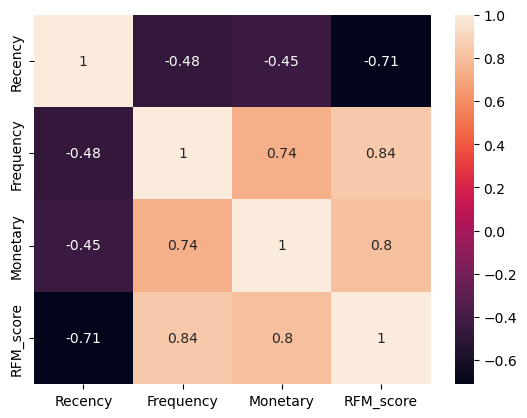

In [133]:
sns.heatmap(log_data.corr(),annot=True);
#after normalizing the data, the correlation has increased

## Feature Scaling For Standardization 

In [135]:
#Before standardization, drop null values
# log_data.isnull().sum()
log_data.dropna(inplace=True)

In [136]:
log_data.isnull().sum()

Recency      0
Frequency    0
Monetary     0
RFM_score    0
dtype: int64

In [137]:
from sklearn.preprocessing import StandardScaler
# we are doing standardization (-1:1 domain) so that the cluster will give equal emphasis to both the features, 
# even if one is measured in thousands and the other in units.
sc=StandardScaler()
X = sc.fit_transform(log_data)

## Execute K-Means Algorithm

In [138]:
from sklearn.cluster import KMeans

In [139]:
## Iterate the K-Means for different values of clusters
## Compute the error term and store in an object

cluster_range = range(1, 15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 100,init='k-means++')
    clusters.fit(X)
#     recording the error for each iteration
    cluster_errors.append( clusters.inertia_ )    # capture the intertia

In [149]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df

,num_clusters,cluster_errors
0,1,17324.000000
1,2,8334.832618
2,3,6251.007807
3,4,5358.721641
4,5,4694.398889
5,6,4170.457198
6,7,3751.148847
7,8,3384.630645
8,9,3067.501922
9,10,2875.574897


b. Decide the optimum number of clusters to be formed.

    

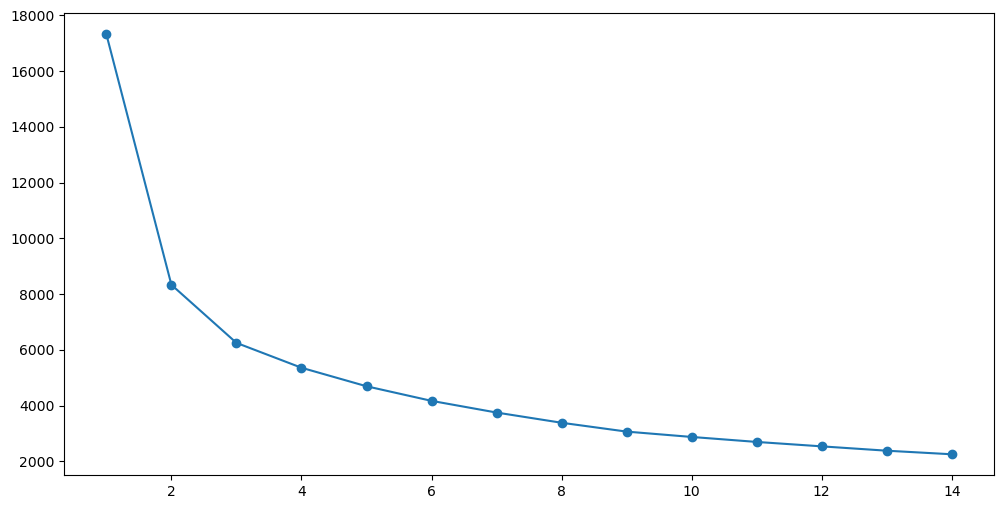

In [150]:
plt.figure(figsize=(12,6))
# we can try with 2 or 3 clusters (where the elbow is)
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [151]:
# Execute the K-Means again with optimal cluster number 
kmeans = KMeans(n_clusters=2,n_init = 100,init='k-means++',random_state=0)

In [152]:
log_data.head()

,Recency,Frequency,Monetary,RFM_score
0,5.784133,0.741937,-2.302585,3
1,0.095310,5.204556,8.368716,12
2,4.305416,3.437208,7.494063,8
3,2.895912,4.291828,7.471733,10
4,5.733665,2.839078,5.812637,4


In [153]:
log_data.dropna(inplace=True)

In [154]:
#Fit the Cluster model/object on the RFM data 
# Fitting the input data
kmeans = kmeans.fit(X)

# Getting the cluster labels
# labels = kmeans.predict(X)

colnames = ["Recency","Frequency","Monetary","RFM_score"]

prediction= kmeans.predict(X)

X_df = pd.DataFrame(X, index=log_data.index,columns= colnames)

X_df["group"] = prediction

In [162]:
X_df

,Recency,Frequency,Monetary,RFM_score,group
0,1.284108,-2.277377,-6.579341,-1.616188,1
1,-2.066859,1.149039,1.363932,1.582136,0
2,0.413078,-0.207938,0.712877,0.160659,0
3,-0.417181,0.448243,0.696255,0.871397,0
4,1.254380,-0.667184,-0.538707,-1.260818,1
...,...,...,...,...,...
4367,1.190006,-1.071465,-0.997082,-1.616188,1
4368,0.936207,-1.342071,-1.595083,-1.616188,1
4369,-0.968419,-0.871777,-1.013744,-0.550080,1
4370,-1.456555,2.205707,0.809195,1.582136,0


In [163]:
X_df.to_csv('clusters_RFMScore.csv')

c. Analyze these clusters and comment on the results.

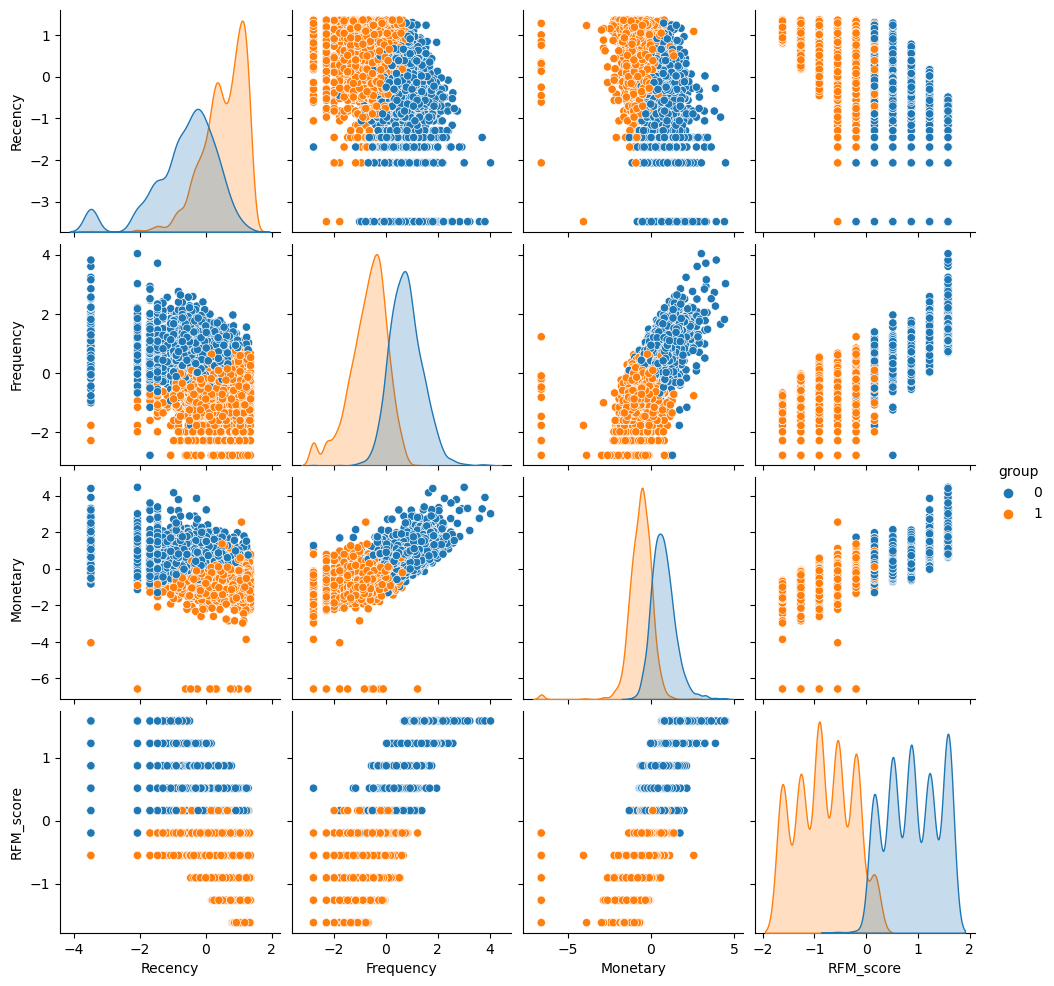

In [164]:
sns.pairplot(X_df,diag_kind='kde',hue='group');

    First row:
    - middle graph: the blue cluster is a group of customers who purchase more and they are recent customers. 
    - last graph: the blue cluster is a group of customers who purchase more, but not that frequent than the orange group

In [181]:
X_df.to_csv('df_rfm_clusters.csv')